In [157]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv("AutoData.csv")

In [12]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Check if exists missing values

In [5]:
print("Missing values: ", df.isnull().sum())

Missing values:  symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


# Check if exists duplicated values

In [6]:
#see how many duplicated values exists
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  0


# Check the statistics of the dataset

In [7]:
df.describe()  

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Check which variables are categorical and numerical

In [13]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
Categorical columns: 
 Index(['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


# One hot encoding to replace categorial values to numeric values

In [159]:
df.drop(['make'],axis=1,inplace=True)

le = preprocessing.LabelEncoder()
for column in df.columns:
    if(df[column].dtypes=='object'):
        df[column] = le.fit_transform(df[column])
        
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Check the target (price) distribution

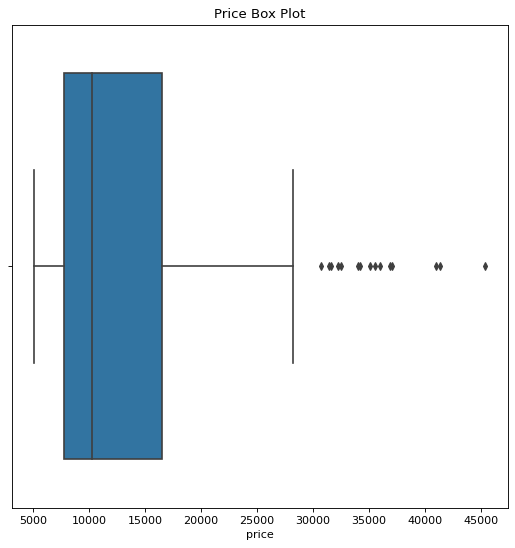

In [20]:
# Let's check the distribution of y variable
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['price'])
plt.title('Price Box Plot')
plt.show()

### As you can see, I don't have many outliers and regarding this dataset isn't big, I'm going to test the model without remove the outliers

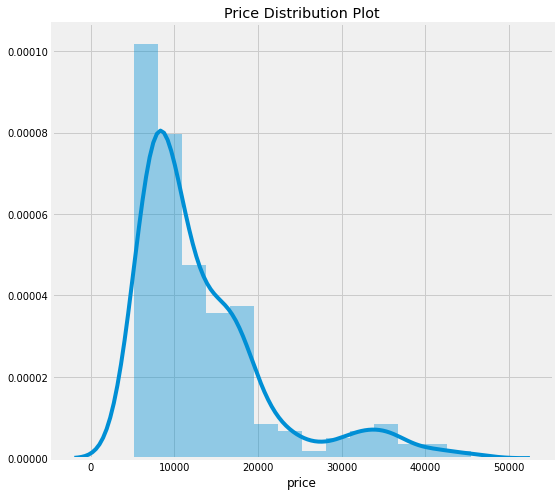

In [161]:
plt.figure(figsize=(8,8))
plt.title('Price Distribution Plot')
sns.distplot(df['price'])
plt.show()

# Checking the features multicollinearity computing the correlation matrix

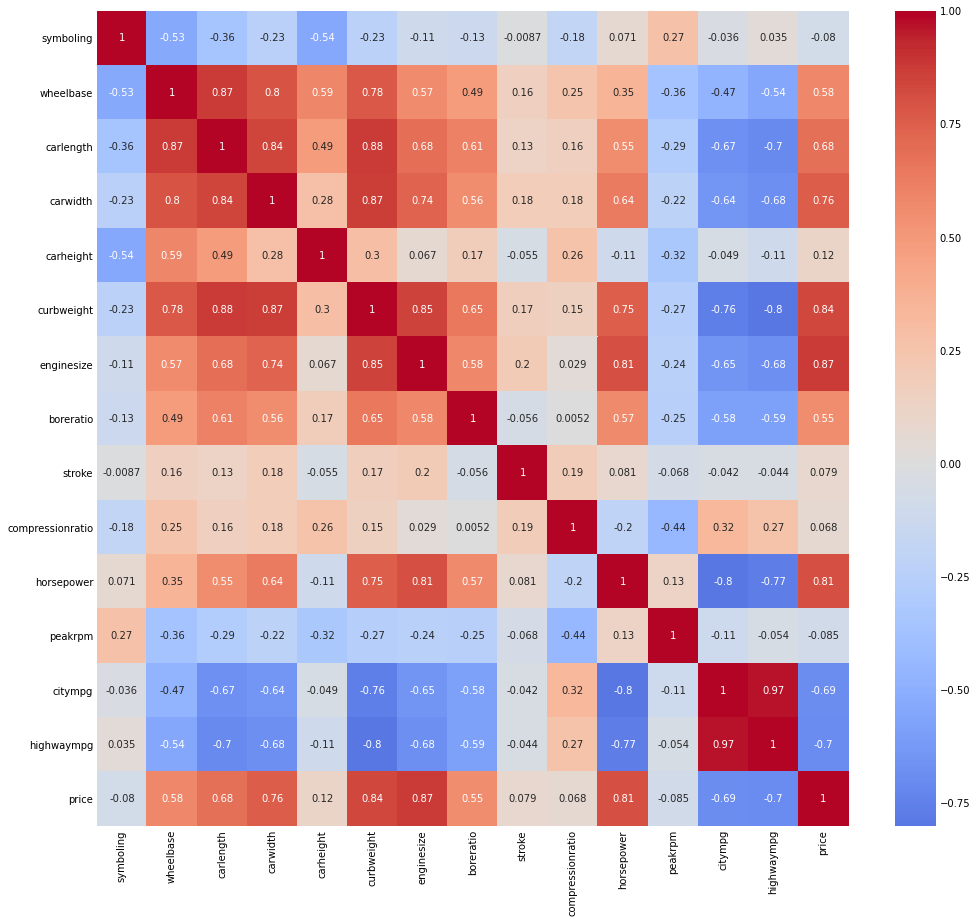

In [162]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='coolwarm',center=0) 

# Model Building

### Using all features

In [163]:
# Train test split
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [164]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Gradient Boosting Regression

- learning_rate = 0.05

In [182]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.05,
          'loss': 'ls',
          'random_state': 0}

In [183]:
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9220135113189261
MAPE     :  11.971657340464633


## Gradient Boosting Regression

- learning_rate = 0.1

In [184]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls',
          'random_state': 0}

In [185]:
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9229011991803464
MAPE     :  11.32527433205362


# Using just correlated features

In [222]:
X = df.drop(['price', 'symboling', 'carheight','stroke','compressionratio', 'peakrpm'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Gradient Boosting Regression

- learning_rate = 0.05

In [223]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.05,
          'loss': 'ls',
          'random_state': 0}

In [224]:
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9284850687793167
MAPE     :  11.01375833632961


## Gradient Boosting Regression

- learning_rate = 0.1

In [195]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls',
          'random_state': 0}

In [196]:
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9205119969257511
MAPE     :  11.095168964785572


### As we can see with correlated features and learning_rate=0.05, I had bigger r2 score and lower MAPE, so this model was considering better. Thus, I'm use it for the next tests

# Plot model deviance

In [225]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.05,
          'loss': 'ls',
          'random_state': 0}

gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9284850687793167
MAPE     :  11.01375833632961


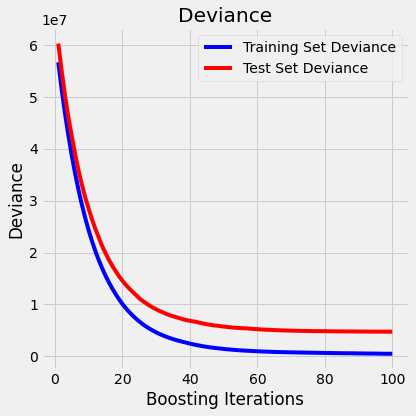

In [226]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

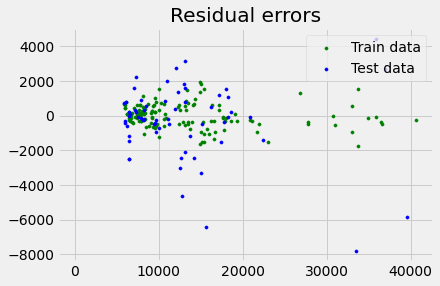

In [227]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(gbr.predict(X_train), gbr.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(gbr.predict(X_test), gbr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()

# Get the features importance to the model

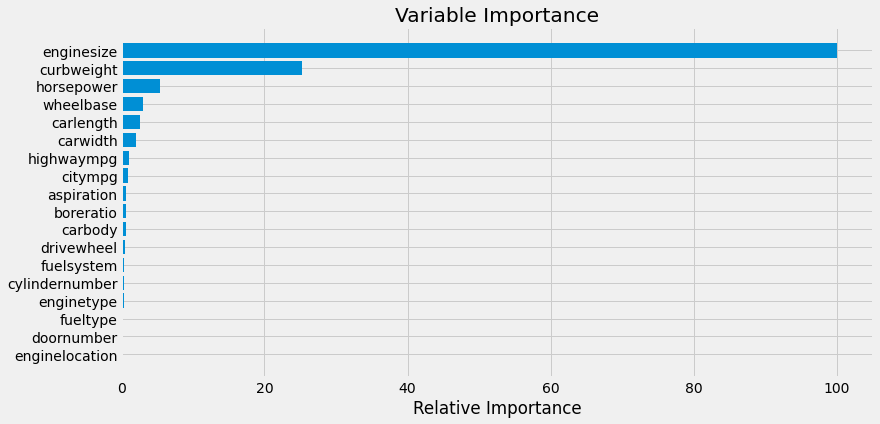

In [228]:
feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Using just the 3 most important variables

In [245]:
X = df[['enginesize', 'curbweight', 'horsepower']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Gradient Boosting Regression

- learning_rate = 0.05

In [246]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.05,
          'loss': 'ls',
          'random_state': 0}

In [247]:
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9256509306843044
MAPE     :  11.972563110769501


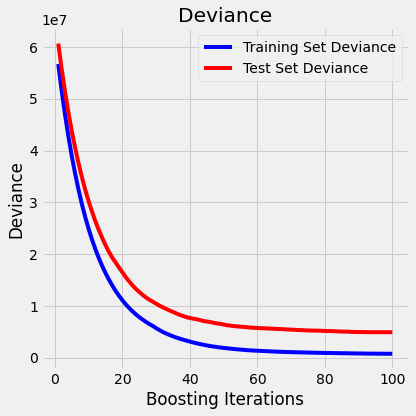

In [248]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

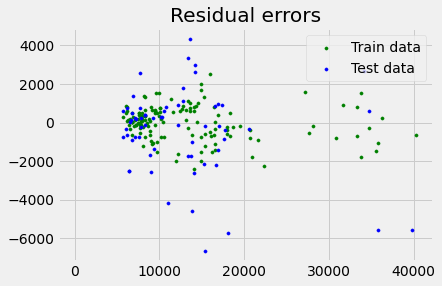

In [249]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(gbr.predict(X_train), gbr.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(gbr.predict(X_test), gbr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()

## Gradient Boosting Regression

- learning_rate = 0.1

In [250]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls',
          'random_state': 0}

In [251]:
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9275362007429857
MAPE     :  12.124280726874098


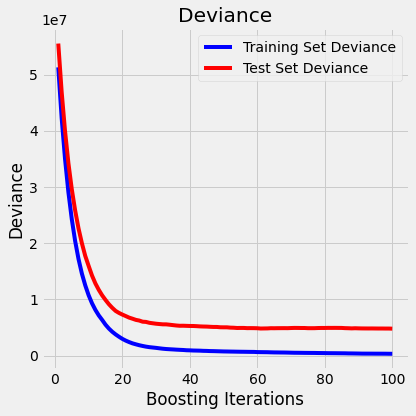

In [252]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

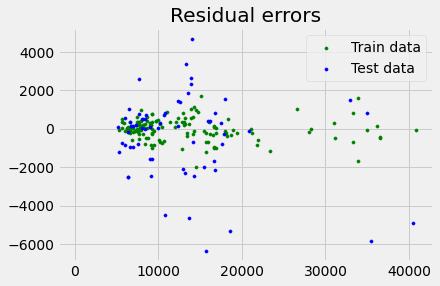

In [253]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(gbr.predict(X_train), gbr.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(gbr.predict(X_test), gbr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()